### CSE 5243 Introduction to Data Mining (SP18)
# Lab 3: Comparing Classifiers

Allen Lin <lin.2237@osu.edu> by March 20 2018

Yuxiao Zhao <zhao.2379@osu.edu>  by March 20 2018

## Part 0. Get the data

the [Wine dataset](http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data) dataset from the [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php). The dataset contains 178 rows and 14 columns.

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [46]:
# read in the csv file
df_wine = pd.read_table('wine.data.txt',header=None, names = ["Class","Alcohol","Malic acid","Ash","Alcalinity of ash","Magnesium","Total phenols","Flavanoids","Nonflavanoid phenols",
                                                              "Proanthocyanins","Color intensity","Hue","OD280/OD315 of diluted wines","Proline"],delimiter=',')

In [47]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Class                           178 non-null int64
Alcohol                         178 non-null float64
Malic acid                      178 non-null float64
Ash                             178 non-null float64
Alcalinity of ash               178 non-null float64
Magnesium                       178 non-null int64
Total phenols                   178 non-null float64
Flavanoids                      178 non-null float64
Nonflavanoid phenols            178 non-null float64
Proanthocyanins                 178 non-null float64
Color intensity                 178 non-null float64
Hue                             178 non-null float64
OD280/OD315 of diluted wines    178 non-null float64
Proline                         178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [48]:
df_wine.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Part 1. Preliminary data analysis

#### Missing values

In [49]:
# summarize the number of missing values in each attribute
df_wine.isnull().sum() 

Class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

No missing values found!

#### Outliers

In [50]:
# to detect the outliers for malic acid
from scipy import stats
df_wine[(np.abs(stats.zscore(df_wine[:]) > 3))]

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
25,1,13.05,2.05,3.22,25.0,124,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830
69,2,12.21,1.19,1.75,16.8,151,1.85,1.28,0.14,2.50,2.85,1.28,3.07,718
73,2,12.99,1.67,2.60,30.0,139,3.30,2.89,0.21,1.96,3.35,1.31,3.50,985
95,2,12.47,1.52,2.20,19.0,162,2.50,2.27,0.32,3.28,2.60,1.16,2.63,937
110,2,11.46,3.74,1.82,19.5,107,3.18,2.58,0.24,3.58,2.90,0.75,2.81,562
115,2,11.03,1.51,2.20,21.5,85,2.46,2.17,0.52,2.01,1.90,1.71,2.87,407
121,2,11.56,2.05,3.23,28.5,119,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465
121,2,11.56,2.05,3.23,28.5,119,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465
123,2,13.05,5.80,2.13,21.5,86,2.62,2.65,0.30,2.01,2.60,0.73,3.10,380
158,3,14.34,1.68,2.70,25.0,98,2.80,1.31,0.53,2.70,13.00,0.57,1.96,660


There are several outliers in the dataset. We make the boxplots for those attributes who have outliers.

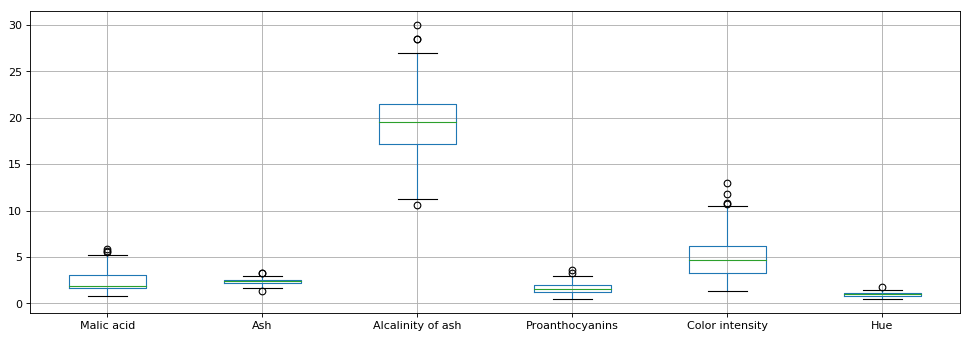

In [51]:
plt.figure(None, figsize=(15, 5),dpi=80)
plt.clf()
df_wine.boxplot(column=["Malic acid","Ash","Alcalinity of ash","Proanthocyanins","Color intensity","Hue"],return_type='axes')
plt.show()

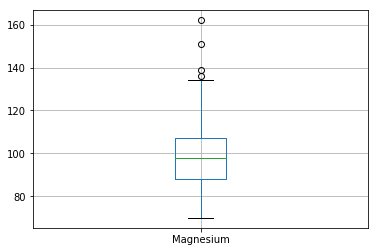

In [52]:
df_wine.boxplot(column=["Magnesium"])

We could observe the outliers in these attributes: malic acid, ash, alcalinity of ash, proanthocyanins, color intensity, hue and magnesium.Especially for magnesium, color intensity and alcalinity of ash, the outliers are significantly beyond the range.

#### correlation

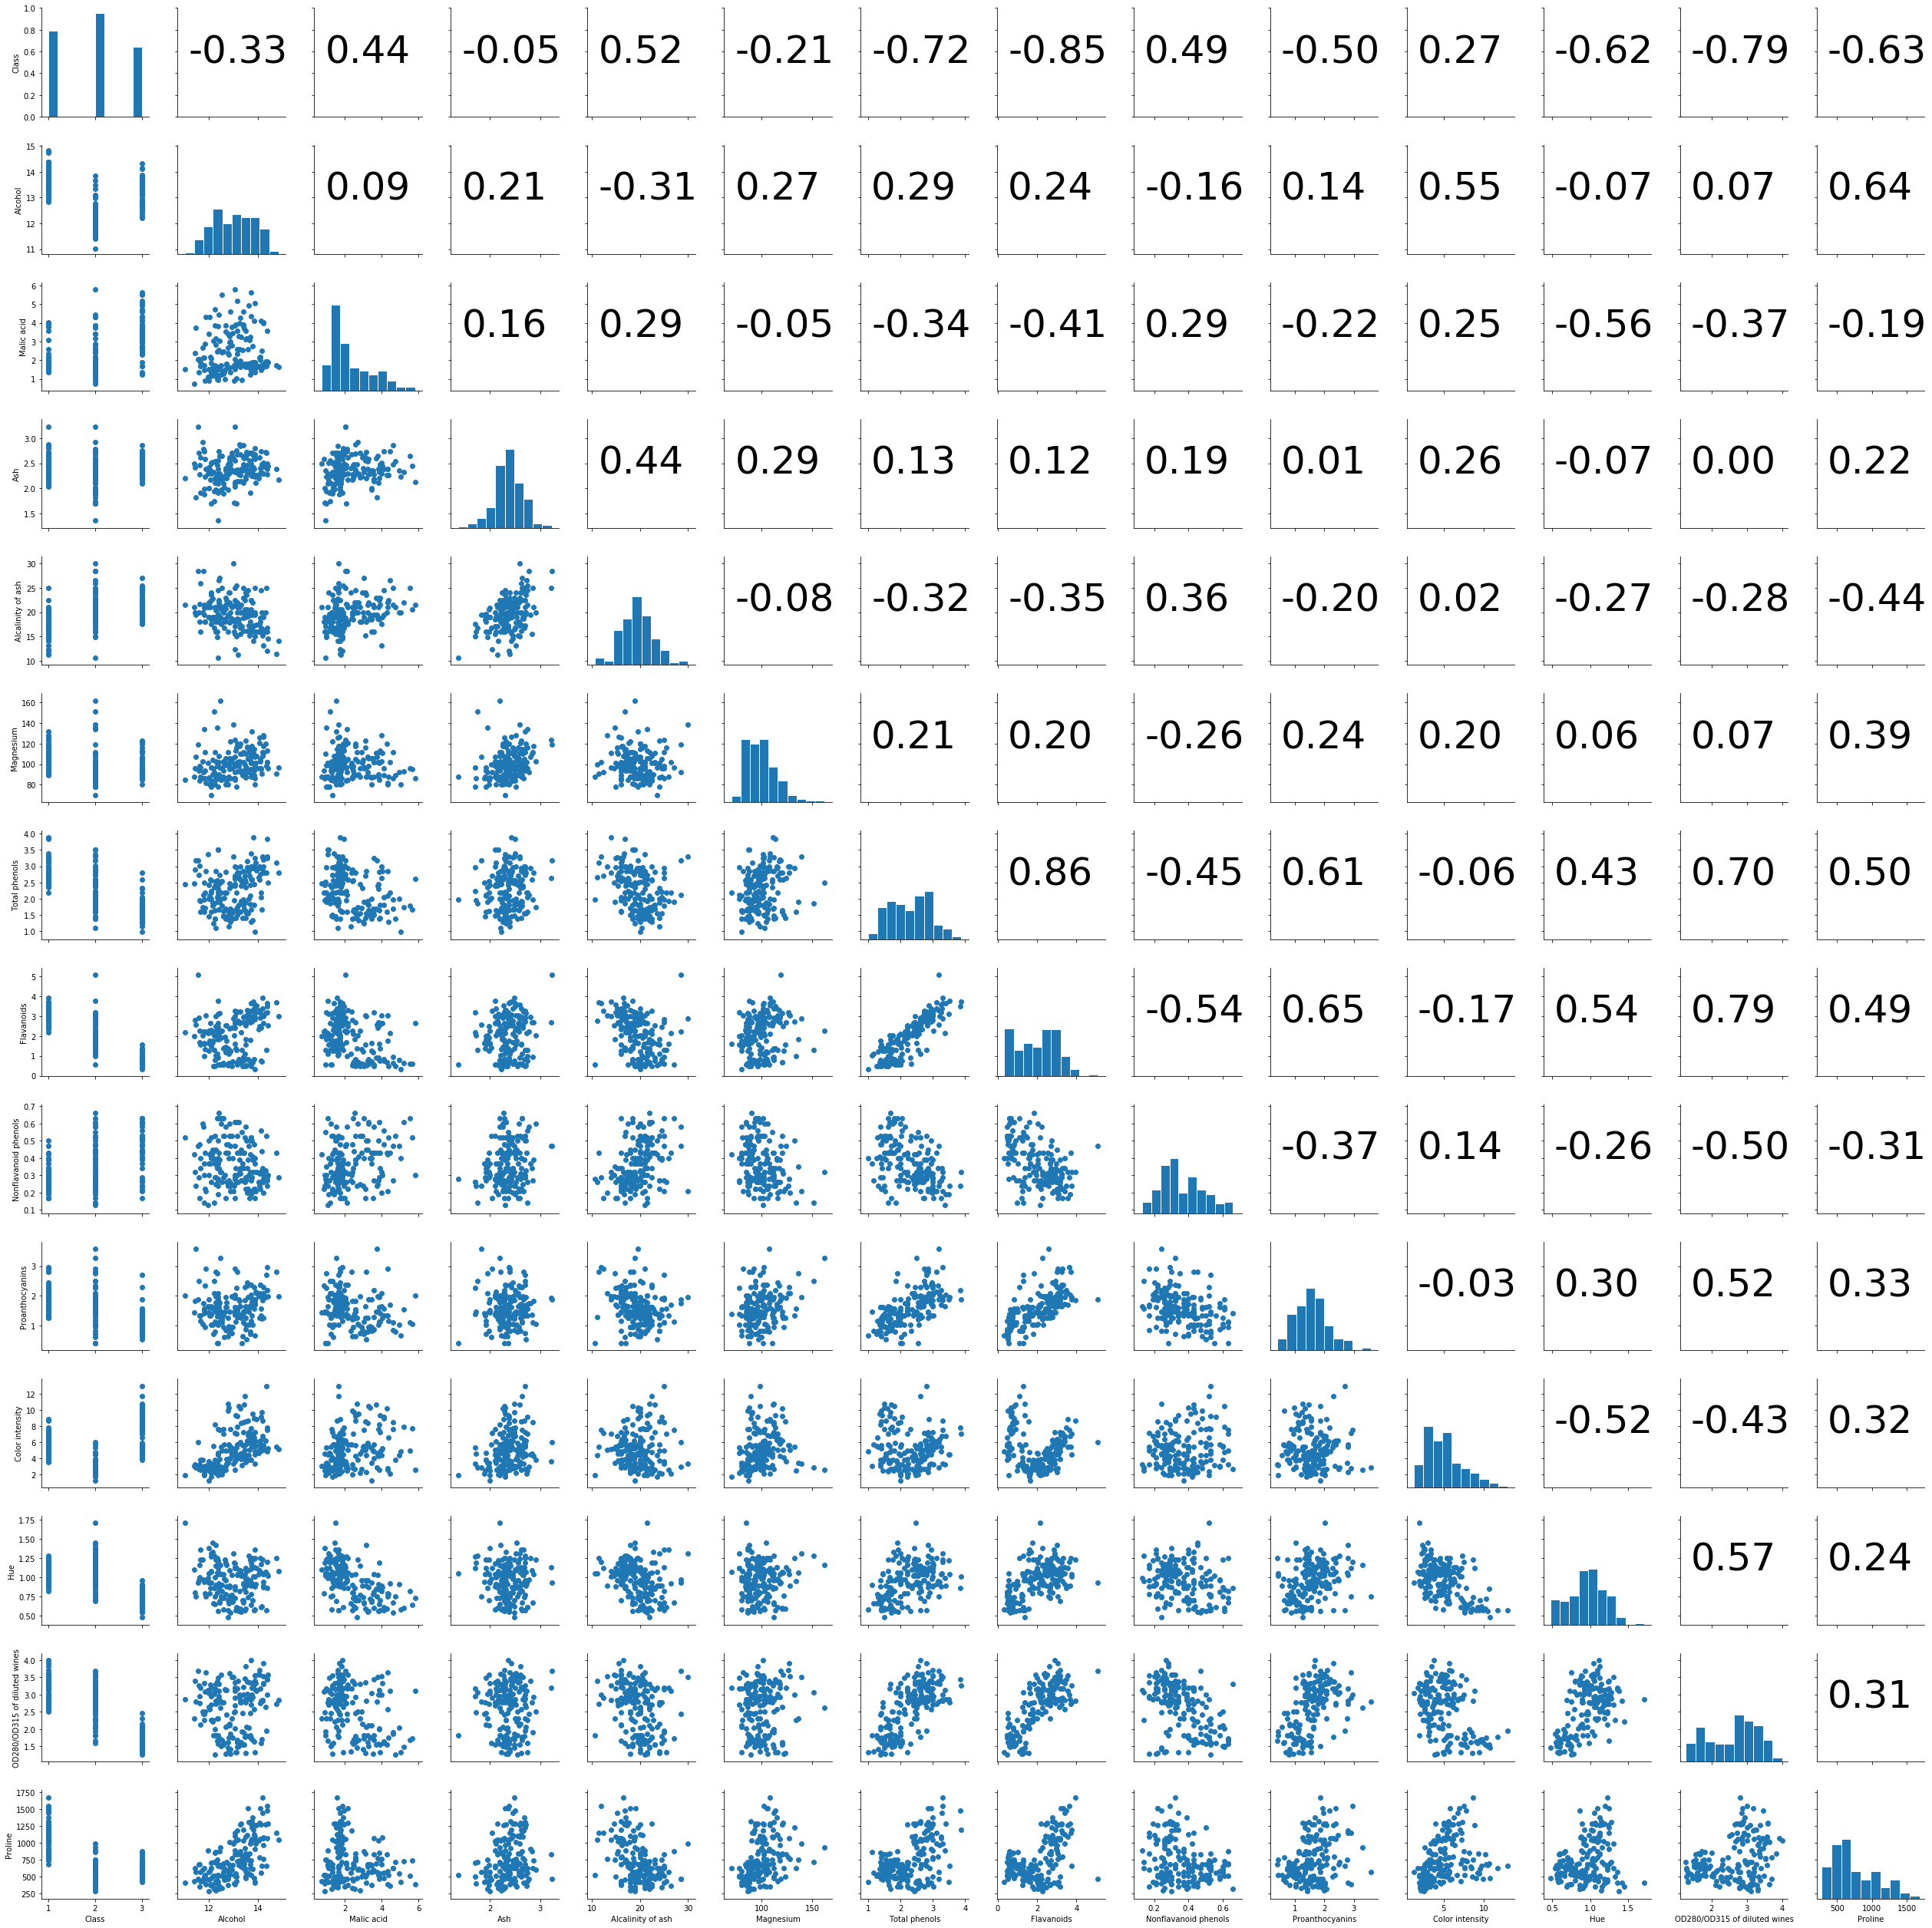

In [53]:
# correlation matrix
import scipy as sp
def corrfunc(x, y, **kws):
    r, _ = sp.stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("{:.2f}".format(r), xy=(.1, .5), xycoords=ax.transAxes, size=50)

g = sns.PairGrid(df_wine)
g = g.map_lower(plt.scatter)
g = g.map_diag(plt.hist, edgecolor="w")
g = g.map_upper(corrfunc)

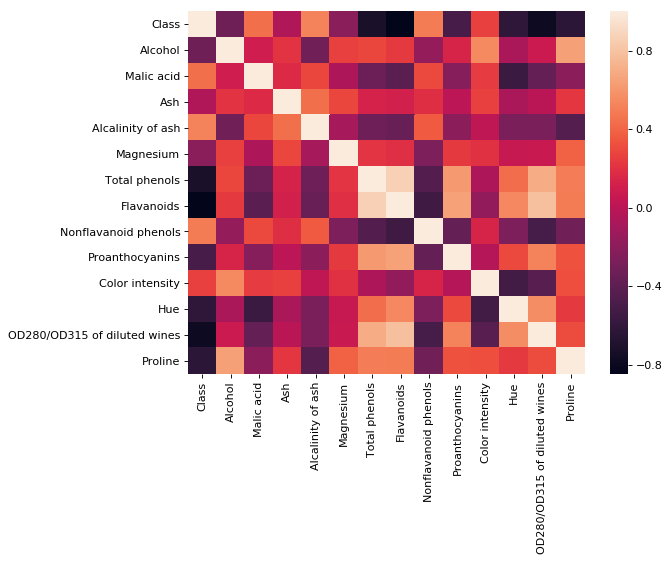

In [54]:
plt.figure(None, figsize=(8, 6),dpi=80)
plt.clf()
corr = df_wine.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

The correlations between class and alcalinity of ash, class and total phenois, class and favanoids, class and hue, class and OD2B0/OD315, class and proline, alcohol and color intensity, alcohol and proline, malic acid and hue,total phenols and favanoids, total phenols and Proanthocyanins, total phenols and OD2B0/OD315, favanoids and nonflavanoid phenois, favanoids and proanthocyanims, favanoids and hue, favanoids and OD2B0/OD315, proanthocyanis and OD2B0/OD315,color and hue are very high.

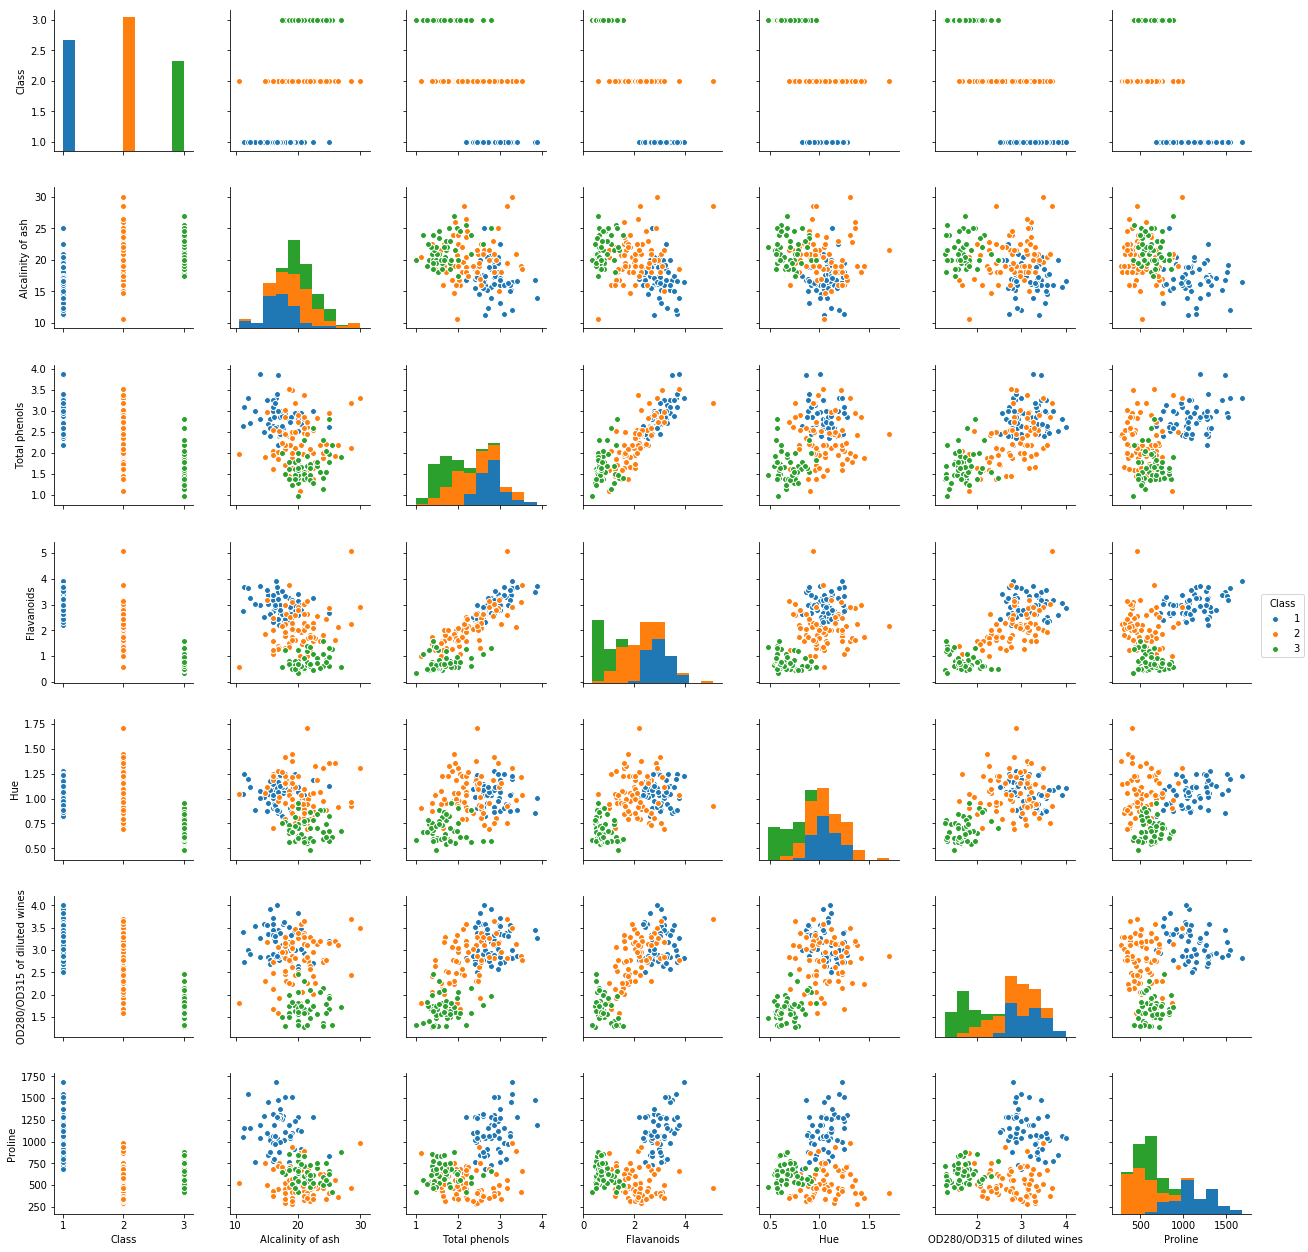

In [55]:
# Plotting the variables against each other and obeserve class separable in these attributes
sns.pairplot(df_wine[["Class","Alcalinity of ash","Total phenols","Flavanoids","Hue","OD280/OD315 of diluted wines","Proline"]],hue='Class')

We plot these scatter plots and histograms among class label and those attributes highly correlated with class. We could infer from these plots how well class would be classified with these variables.

#### wine.data.txt
This file contains results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines. 
There are 14 attributes, including Class, Alcohol, Malic acid, Ash, Alcalinity of ash, Magnesium, Total phenols, Flavanoids, Nonflavanoid phenols, Proanthocyanins, Color intensity, Hue, OD280/OD315 of diluted wines, Proline.


Pos.|Variable|Type(categoric/numeric)|Type(binary/discrete/continuous)|Description
---:|---|:---:|---|---
1|Class|categoric|discrete|class label(1,2 or 3)
2|Alcohol|numeric|continuous|
3|Malic acid|numeric|continuous|
4|Ash|numeric|continuous|
5|Alcalinity of ash|numeric|continuous|
6|Magnesium|numeric|continuous|
7|Total phenols|numeric|continuous|
8|Flavanoids|numeric|continuous|
9|Nonflavanoid phenols|numeric|continuous|
10|Proanthocyanins|numeric|continuous|
11|Color intensity|numeric|continuous|
12|Hue|numeric|continuous|
13|OD280/OD315 of diluted wines|numeric|continuous|
14|Proline|numeric|continuous|

In [56]:
# descriptive statistics
df_wine.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


We could find that these attributes are on different scales. Some of them have huge values: magnesium and proline.We might need to standardize the data before classification.

## Part 2. Data preprocessing

In [57]:
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(df_wine[["Alcalinity of ash","Total phenols","Flavanoids","Hue","OD280/OD315 of diluted wines","Proline"]])
df_wine_std = std_scale.transform(df_wine[["Alcalinity of ash","Total phenols","Flavanoids","Hue","OD280/OD315 of diluted wines","Proline"]])

In [58]:
df_wine_std = pd.DataFrame(df_wine_std, columns =["AlcalinityOfAsh","TotalPhenols","Flavanoids","Hue","OD280/OD315","Proline"] )
df_wine_std['Class'] = df_wine['Class']

In [59]:
df_wine_std.head()

,AlcalinityOfAsh,TotalPhenols,Flavanoids,Hue,OD280/OD315,Proline,Class
0,-1.169593,0.808997,1.034819,0.362177,1.847920,1.013009,1
1,-2.490847,0.568648,0.733629,0.406051,1.113449,0.965242,1
2,-0.268738,0.808997,1.215533,0.318304,0.788587,1.395148,1
3,-0.809251,2.491446,1.466525,-0.427544,1.184071,2.334574,1
4,0.451946,0.808997,0.663351,0.362177,0.449601,-0.037874,1


We standardize the data for the further classification because we want attributes to be comparable when measuring similarities. We do feature subset selection and select "Alcalinity of ash","Total phenols","Flavanoids","Hue","OD280/OD315 of diluted wines","Proline" based on the preliminary analysis. These attributes are correlated to class and separable by class.

## Part 3. Choose an evaluation approach

In [60]:
from sklearn.model_selection import train_test_split

wine_train, wine_test = train_test_split(df_wine_std, test_size=0.2)

In [61]:
wine_train.shape

(142, 7)

In [62]:
wine_test.shape

(36, 7)

In [63]:
wine_train.head()

,AlcalinityOfAsh,TotalPhenols,Flavanoids,Hue,OD280/OD315,Proline,Class
174,1.052516,-0.793334,-1.284344,-1.129518,-1.485445,0.009893,3
124,0.451946,0.905137,1.004700,-0.910151,1.452436,-1.168369,2
123,0.602088,0.520578,0.623193,-0.997898,0.689716,-1.168369,2
157,2.253656,-0.633101,-1.455019,-1.261138,-1.245330,0.423878,3
86,0.992459,-0.825381,-0.340615,1.634506,-0.496736,-0.802153,2


We would use stratified k-folds cross validation. Because firstly, this is a small dataset, we could have as much data as possible for training and testing in cross validation; secondly, we could build more robust model in case the arbitrary training dataset is misleading; thirdly, stratified k fold could ensure the representativeness of samples from different classes.

## Part 4. Build and evaluate six classifiers using the training/validation set

In [64]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,roc_auc_score,roc_curve, auc
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.preprocessing import label_binarize

X = np.array(wine_train.iloc[:, 0:6])
y = np.array(wine_train['Class']) 

In [65]:
# plotting for the confusion matrix used in each classifications below

def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.gray_r):
    plt.matshow(df_confusion, cmap=cmap)
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns, rotation=45)
    plt.yticks(tick_marks, df_confusion.index)
    plt.ylabel(df_confusion.index.name)
    plt.xlabel(df_confusion.columns.name)
    

accuracy score: 0.936620
f1_score: 0.939303

 Predicted   1   2   3  All
Actual                    
1          44   3   0   47
2           3  53   3   59
3           0   0  36   36
All        47  56  39  142 

AUC (macro):0.986428
AUC (micro):0.984973


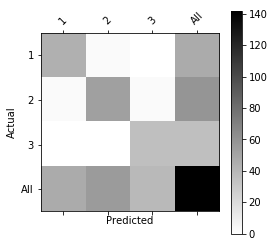

In [66]:
#k-Nearest Neighbors 
from sklearn.neighbors import KNeighborsClassifier

# instantiate learning model 

# Tunable params:
# n_neighbors: the number of neighbors used during classification
# value used: 3

# weights: weight function used in prediction. how much each attribute affects the classification
# value used: uniform(default), All points in each neighborhood are weighted equally.

# algorithm: Algorithm used to compute the nearest neighbors (auto, ball_tree, kd_tree, brute)
# value used: auto(default), attempt to decide the most appropriate algorithm based on the values passed to fit method.

# leaf_size: eaf size passed to BallTree or KDTree
# value used: 30 (default)

# p: Power parameter for the Minkowski metric
# value used: 2(default), using the euclidean_distance

# metric: the distance metric to use for the tree
# value used: minkowski(default), standard Euclidean metric when p=2

# metric_params: Additional keyword arguments for the metric function
# value used: None

# n_jobs: The number of parallel jobs to run for neighbors search (NOT TUNATBLE)

knn = KNeighborsClassifier(n_neighbors=3, weights='uniform', algorithm='auto',
                           leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=1)


# Learn to predict each class against the other
predicted = cross_val_predict(knn, X, y, cv=3)  # stratified 5-fold cross validation
y_score = cross_val_predict(knn, X, y, cv=3, method='predict_proba')
knn_f = knn.fit(X,y)

# report accuracy and f1-score
acc = accuracy_score(y, predicted)
print('accuracy score: %f'%acc)
f1 = f1_score(y, predicted,average='macro')
print('f1_score: %f'%f1)

y_actu = pd.Series(y, name='Actual')
y_pred = pd.Series(predicted, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
plot_confusion_matrix(df_confusion)
print('\n',df_confusion,'\n')

# multiclass ROC curve
# Binarize the output
y_b = label_binarize(y, classes=[1, 2, 3])
n_classes = y_b.shape[1]

# Compute ROC curve and ROC area for each class
fpr_knn = dict()
tpr_knn = dict()
roc_auc_knn = dict()
for i in range(n_classes):
    fpr_knn[i], tpr_knn[i], _ = roc_curve(y_b[:, i], y_score[:, i])
    roc_auc_knn[i] = auc(fpr_knn[i], tpr_knn[i])

# Compute micro-average ROC curve and ROC area
fpr_knn["micro"], tpr_knn["micro"], _ = roc_curve(y_b.ravel(), y_score.ravel())
roc_auc_knn["micro"] = auc(fpr_knn["micro"], tpr_knn["micro"])

from scipy import interp

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr_knn = np.unique(np.concatenate([fpr_knn[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr_knn = np.zeros_like(all_fpr_knn)
for i in range(n_classes):
    mean_tpr_knn += interp(all_fpr_knn, fpr_knn[i], tpr_knn[i])

# Finally average it and compute AUC
mean_tpr_knn /= n_classes

fpr_knn["macro"] = all_fpr_knn
tpr_knn["macro"] = mean_tpr_knn
roc_auc_knn["macro"] = auc(fpr_knn["macro"], tpr_knn["macro"])

print('AUC (macro):%f'%roc_auc_knn["macro"])
print('AUC (micro):%f'%roc_auc_knn["micro"])

### Decision Tree

accuracy score: 0.922535
f1_score: 0.924384

 Predicted   1   2   3  All
Actual                    
1          44   3   0   47
2           4  54   1   59
3           2   1  33   36
All        50  58  34  142 

AUC (macro):0.937360
AUC (micro):0.936620


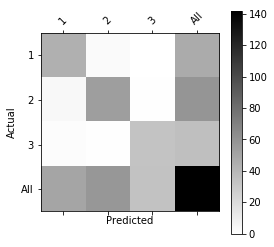

In [67]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# instantiate learning model 

# params:
# criterion: The function to measure the quality of a split
# value used: gini(default), using gini impurity

# splitter: The strategy used to choose the split at each node
# value used: best(default), chose the best split

# max_depth: The maximum depth of the tree
# value used: None(default), nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples

# min_samples_split: The minimum number of samples required to split an internal node
# value used: 2(default), requires at least 2 samples to split

# min_samples_leaf: The minimum number of samples required to be at a leaf node
# value used: 1(default)

# min_weight_fraction_leaf: The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node
# value used: 0(default), all samples will have equal weights

# max_features: The number of features to consider when looking for the best spli
# value used: None(default),as many as needed

# random_state: RandomState instance or None, optional (default=None)
# value used: None(default), RandomState instance used by np.random

# max_leaf_nodes: Grow a tree with max_leaf_nodes in best-first fashion
# value used: None, unlimited number of leaf nodes

# min_impurity_decrease: A node will be split if this split induces a decrease of the impurity greater than or equal to this value
# value used: 0(default)

# min_impurity_split: Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf
# value used: None(default), no early stopping in tree growth

# class_weight: Weights associated with classes in the form {class_label: weight}
# value used: None(default), all classes weight the same

# presort: Whether to presort the data to speed up the finding of best splits in fitting (NOT TUNABLE)


dct = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None,
                             min_samples_split=2, min_samples_leaf=1, 
                             min_weight_fraction_leaf=0.0, max_features=None, 
                             random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, 
                             min_impurity_split=None, class_weight=None, presort=False)


# Learn to predict each class against the other
predicted = cross_val_predict(dct, X, y, cv=3)  # stratified 5-fold cross validation
y_score = cross_val_predict(dct, X, y, cv=3, method='predict_proba')
dct_f = dct.fit(X,y)

# report accuracy and f1-score
acc = accuracy_score(y, predicted)
print('accuracy score: %f'%acc)
f1 = f1_score(y, predicted,average='macro')
print('f1_score: %f'%f1)

y_actu = pd.Series(y, name='Actual')
y_pred = pd.Series(predicted, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
plot_confusion_matrix(df_confusion)
print('\n',df_confusion,'\n')

# multiclass ROC curve
# Compute ROC curve and ROC area for each class
fpr_dct = dict()
tpr_dct = dict()
roc_auc_dct = dict()
for i in range(n_classes):
    fpr_dct[i], tpr_dct[i], _ = roc_curve(y_b[:, i], y_score[:, i])
    roc_auc_dct[i] = auc(fpr_dct[i], tpr_dct[i])

# Compute micro-average ROC curve and ROC area
fpr_dct["micro"], tpr_dct["micro"], _ = roc_curve(y_b.ravel(), y_score.ravel())
roc_auc_dct["micro"] = auc(fpr_dct["micro"], tpr_dct["micro"])

# Compute macro-average ROC curve and ROC area
# First aggregate all false positive rates
all_fpr_dct = np.unique(np.concatenate([fpr_dct[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr_dct = np.zeros_like(all_fpr_dct)
for i in range(n_classes):
    mean_tpr_dct += interp(all_fpr_dct, fpr_dct[i], tpr_dct[i])

# Finally average it and compute AUC
mean_tpr_dct /= n_classes

fpr_dct["macro"] = all_fpr_dct
tpr_dct["macro"] = mean_tpr_dct
roc_auc_dct["macro"] = auc(fpr_dct["macro"], tpr_dct["macro"])

print('AUC (macro):%f'%roc_auc_dct["macro"])
print('AUC (micro):%f'%roc_auc_dct["micro"])

### Naïve Bayes

accuracy score: 0.943662
f1_score: 0.945773

 Predicted   1   2   3  All
Actual                    
1          45   2   0   47
2           3  55   1   59
3           0   2  34   36
All        48  59  35  142 

AUC (macro):0.995536
AUC (micro):0.995437


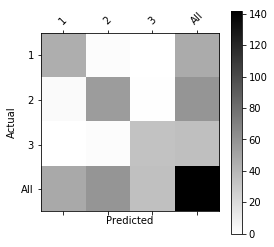

In [68]:
#Naïve Bayes

from sklearn.naive_bayes import GaussianNB

# instantiate learning model 

# params:
# priors: Prior probabilities of the classes.
# value used: None, priors are adjusted according to the data.

nbs = GaussianNB(priors=None)

# Learn to predict each class against the other
predicted = cross_val_predict(nbs, X, y, cv=3)  # stratified 5-fold cross validation
y_score = cross_val_predict(nbs, X, y, cv=3, method='predict_proba')
nbs_f = nbs.fit(X,y)

# report accuracy and f1-score
acc = accuracy_score(y, predicted)
print('accuracy score: %f'%acc)
f1 = f1_score(y, predicted,average='macro')
print('f1_score: %f'%f1)

y_actu = pd.Series(y, name='Actual')
y_pred = pd.Series(predicted, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
plot_confusion_matrix(df_confusion)
print('\n',df_confusion,'\n')

# multiclass ROC curve
# Compute ROC curve and ROC area for each class
fpr_nbs = dict()
tpr_nbs = dict()
roc_auc_nbs = dict()
for i in range(n_classes):
    fpr_nbs[i], tpr_nbs[i], _ = roc_curve(y_b[:, i], y_score[:, i])
    roc_auc_nbs[i] = auc(fpr_nbs[i], tpr_nbs[i])

# Compute micro-average ROC curve and ROC area
fpr_nbs["micro"], tpr_nbs["micro"], _ = roc_curve(y_b.ravel(), y_score.ravel())
roc_auc_nbs["micro"] = auc(fpr_nbs["micro"], tpr_nbs["micro"])

# Compute macro-average ROC curve and ROC area
# First aggregate all false positive rates
all_fpr_nbs = np.unique(np.concatenate([fpr_nbs[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr_nbs = np.zeros_like(all_fpr_nbs)
for i in range(n_classes):
    mean_tpr_nbs += interp(all_fpr_nbs, fpr_nbs[i], tpr_nbs[i])

# Finally average it and compute AUC
mean_tpr_nbs /= n_classes

fpr_nbs["macro"] = all_fpr_nbs
tpr_nbs["macro"] = mean_tpr_nbs
roc_auc_nbs["macro"] = auc(fpr_nbs["macro"], tpr_nbs["macro"])

print('AUC (macro):%f'%roc_auc_nbs["macro"])
print('AUC (micro):%f'%roc_auc_nbs["micro"])

### Artificial Neural Network

accuracy score: 0.950704
f1_score: 0.953157

 Predicted   1   2   3  All
Actual                    
1          45   2   0   47
2           3  54   2   59
3           0   0  36   36
All        48  56  38  142 

AUC (macro):0.996927
AUC (micro):0.996008


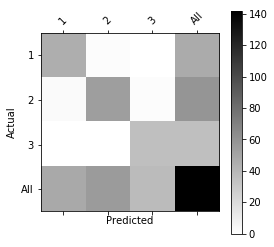

In [69]:
from sklearn.neural_network import MLPClassifier

# instantiate learning model 

# params: 
# hidden_layer_sizes: represents the number of neurons in the ith hidden layer
# value used: 100(default), 100 neurons used for ith hidden layer

# activation: Activation function for the hidden layer
# value used: relu(default), the rectified linear unit function, returns f(x) = max(0, x)

# solver: The solver for weight optimization
# value used: adam(default), a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy Ba

# alpha: L2 penalty (regularization term) parameter
# value used: 0.0001

# batch_size: Size of minibatches for stochastic optimizers
# value used: auto(default), batch_size=min(200, n_samples)

# learning_rate: Learning rate schedule for weight updates
# value used: constant(default), constant learning rate given by ‘learning_rate_init’

# learning_rate_init: The initial learning rate used
# value used: .001, step-size in updating the weights

# power_t: The exponent for inverse scaling learning rate
# value used: .5(default), only used when solver is sgd, so not used in our case

# max_iter: Maximum number of iterations (default 200, changed to 999 to avoid warning)
# value used: 999

# shuffle: Whether to shuffle samples in each iteration
# value used: True(default)

# random_state: the seed used by the random number generator
# value used: None(default),If None, the random number generator is the RandomState instance used by np.random.

# tol: Tolerance for the optimization
# value used: .0001(default), when the loss or score is not improving by at least tol for two consecutive iterations,
#                             convergence is considered to be reached and training stops.

# verbose: Whether to print progress messages to stdout (NOT TUNABLE)

# warm_start: When set to True, reuse the solution of the previous call to fit as initialization, 
# otherwise, just erase the previous solution(NOT TUNABLE)

# momentum: Momentum for gradient descent update, Only used when solver=’sgd’.
# value used: .9(default), not used in our case

# nesterovs_momentum: Whether to use Nesterov’s momentum, Only used when solver=’sgd’ and momentum > 0.
# value used: True, not used in our case

# early_stopping: Whether to use early stopping to terminate training when validation score is not improving
# value used: False(default)

# validation_fraction: The proportion of training data to set aside as validation set for early stopping
# value used: .1 (default), not used in our case since early_stopping is false

# beta_1: Exponential decay rate for estimates of first moment vector in adam, should be in [0, 1). Only used when solver=’adam’
# value used: .9 (default)

# beta_2: Exponential decay rate for estimates of second moment vector in adam, should be in [0, 1).
# value used: .999(default)

# epsilon: Value for numerical stability in adam. Only used when solver=’adam’
# value used: 1e-08 (default)

mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', 
                    alpha=0.0001, batch_size='auto', learning_rate='constant', 
                    learning_rate_init=0.001, power_t=0.5, max_iter= 999, shuffle=True, 
                    random_state=None, tol=0.0001, verbose=False, warm_start=False,
                    momentum=0.9, nesterovs_momentum=True, early_stopping=False, 
                    validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)


# Learn to predict each class against the other
predicted = cross_val_predict(mlp, X, y, cv=3)  # stratified 5-fold cross validation
y_score = cross_val_predict(mlp, X, y, cv=3, method='predict_proba')
mlp_f = mlp.fit(X,y)

# report accuracy and f1-score
acc = accuracy_score(y, predicted)
print('accuracy score: %f'%acc)
f1 = f1_score(y, predicted,average='macro')
print('f1_score: %f'%f1)

y_actu = pd.Series(y, name='Actual')
y_pred = pd.Series(predicted, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
plot_confusion_matrix(df_confusion)
print('\n',df_confusion,'\n')

# multiclass ROC curve
# Compute ROC curve and ROC area for each class
fpr_mlp = dict()
tpr_mlp = dict()
roc_auc_mlp = dict()
for i in range(n_classes):
    fpr_mlp[i], tpr_mlp[i], _ = roc_curve(y_b[:, i], y_score[:, i])
    roc_auc_mlp[i] = auc(fpr_mlp[i], tpr_mlp[i])

# Compute micro-average ROC curve and ROC area
fpr_mlp["micro"], tpr_mlp["micro"], _ = roc_curve(y_b.ravel(), y_score.ravel())
roc_auc_mlp["micro"] = auc(fpr_mlp["micro"], tpr_mlp["micro"])

# Compute macro-average ROC curve and ROC area
# First aggregate all false positive rates
all_fpr_mlp = np.unique(np.concatenate([fpr_mlp[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr_mlp = np.zeros_like(all_fpr_mlp)
for i in range(n_classes):
    mean_tpr_mlp += interp(all_fpr_mlp, fpr_mlp[i], tpr_mlp[i])

# Finally average it and compute AUC
mean_tpr_mlp /= n_classes

fpr_mlp["macro"] = all_fpr_mlp
tpr_mlp["macro"] = mean_tpr_mlp
roc_auc_mlp["macro"] = auc(fpr_mlp["macro"], tpr_mlp["macro"])

print('AUC (macro):%f'%roc_auc_mlp["macro"])
print('AUC (micro):%f'%roc_auc_mlp["micro"])

### Support Vector Machine

accuracy score: 0.957746
f1_score: 0.959565

 Predicted   1   2   3  All
Actual                    
1          45   2   0   47
2           2  55   2   59
3           0   0  36   36
All        47  57  38  142 

AUC (macro):0.989113
AUC (micro):0.990379


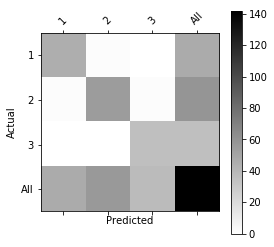

In [70]:
#Support Vector Machine

from sklearn.svm import LinearSVC
# instantiate learning model 

# params: 

# penalty: Specifies the norm used in the penalization
# value used: l2(default),‘l2’ penalty is the standard used in SVC

# loss: Specifies the loss function
# value used: squared_hinge(default),the square of the hinge loss

# dual: Select the algorithm to either solve the dual or primal optimization problem
# value ussed: False, Prefer dual=False when n_samples > n_features

# tol: Tolerance for stopping criteria
# value used: .0001(default)

# C: Penalty parameter C of the error term
# value used: 1.0 (default)

# multi_class: Determines the multi-class strategy if y contains more than two classes
# value used: ovr(default), not used since we only have two classes

# fit_intercept: Whether to calculate the intercept for this model

# intercept_scaling: When self.fit_intercept is True, instance vector x becomes [x, self.intercept_scaling],
#                    i.e. a “synthetic” feature with constant value equals to intercept_scaling is appended to the instance vector.
# value used: True(default)

# class_weight: Set the parameter C of class i to class_weight[i]*C for SVC
# value used: None, all classes weight one

# verbose: Enable verbose output (NOT TUNABLE)

# random_state: the seed of the pseudo random number generator to use when shuffling the data
# value used: None (default), If None, the random number generator is the RandomState instance used by np.random

# max_iter: The maximum number of iterations to be run
# value used: 1000(default)

svc = LinearSVC(penalty='l2', loss='squared_hinge', dual=False, tol=0.0001, C=1.0,
                multi_class='ovr', fit_intercept=True, intercept_scaling=1, 
                class_weight=None, verbose=0, random_state=None, max_iter=1000)

# Learn to predict each class against the other
predicted = cross_val_predict(svc, X, y, cv=3)  # stratified 5-fold cross validation
y_score = cross_val_predict(svc, X, y, cv=3, method='decision_function')
svc_f = svc.fit(X,y)

# report accuracy and f1-score
acc = accuracy_score(y, predicted)
print('accuracy score: %f'%acc)
f1 = f1_score(y, predicted,average='macro')
print('f1_score: %f'%f1)

y_actu = pd.Series(y, name='Actual')
y_pred = pd.Series(predicted, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
plot_confusion_matrix(df_confusion)
print('\n',df_confusion,'\n')

# multiclass ROC curve
# Compute ROC curve and ROC area for each class
fpr_svc = dict()
tpr_svc = dict()
roc_auc_svc = dict()
for i in range(n_classes):
    fpr_svc[i], tpr_svc[i], _ = roc_curve(y_b[:, i], y_score[:, i])
    roc_auc_svc[i] = auc(fpr_svc[i], tpr_svc[i])

# Compute micro-average ROC curve and ROC area
fpr_svc["micro"], tpr_svc["micro"], _ = roc_curve(y_b.ravel(), y_score.ravel())
roc_auc_svc["micro"] = auc(fpr_svc["micro"], tpr_svc["micro"])

# Compute macro-average ROC curve and ROC area
# First aggregate all false positive rates
all_fpr_svc = np.unique(np.concatenate([fpr_svc[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr_svc = np.zeros_like(all_fpr_svc)
for i in range(n_classes):
    mean_tpr_svc += interp(all_fpr_svc, fpr_svc[i], tpr_svc[i])

# Finally average it and compute AUC
mean_tpr_svc /= n_classes

fpr_svc["macro"] = all_fpr_svc
tpr_svc["macro"] = mean_tpr_svc
roc_auc_svc["macro"] = auc(fpr_svc["macro"], tpr_svc["macro"])

print('AUC (macro):%f'%roc_auc_svc["macro"])
print('AUC (micro):%f'%roc_auc_svc["micro"])

### Ensemble Classifier

accuracy score: 0.915493
f1_score: 0.915306

 Predicted   1   2   3  All
Actual                    
1          45   2   0   47
2           3  54   2   59
3           0   5  31   36
All        48  61  33  142 

AUC (macro):0.989745
AUC (micro):0.989672


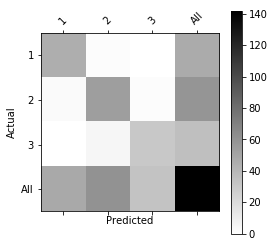

In [71]:
#Ensemble Classifier 

from sklearn.ensemble import RandomForestClassifier
# instantiate learning model 

# params: 

# n_estimators: The number of trees in the forest
# value used: 10 (default)

# criterion: The function to measure the quality of a split
# value used: gini(default), impurity used

# max_depth: The maximum depth of the tree
# value used:  None(default), odes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples

# min_samples_split: The minimum number of samples required to split an internal node
# value used: 2(default)

# min_samples_leaf: The minimum number of samples required to be at a leaf node
# value used: 1 (default)

# min_weight_fraction_leaf: The minimum weighted fraction of the sum total of weights (of all the input samples) 
#                           required to be at a leaf node
# value used: 0(default), Samples have equal weight

# max_features: The number of features to consider when looking for the best split
# value used: auto(defualt), then max_features=sqrt(n_features)

# max_leaf_nodes: Grow trees with max_leaf_nodes in best-first fashion
# value used: None(default), unlimited number of leaf nodes

# min_impurity_decrease: A node will be split if this split induces a decrease of the impurity greater than or equal to this value
# value used: 0(default)

# min_impurity_split: Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf
# value used: None

# bootstrap: Whether bootstrap samples are used when building trees
# value used: True(default), bootstrap samples are used

# oob_score: Whether to use out-of-bag samples to estimate the generalization accuracy.
# value used: False(default), not to use out of bag samples

# n_jobs: The number of jobs to run in parallel for both fit and predict. If -1, then the number of jobs is set to the number of cores(NOT TUNABLE)

# random_state: the seed used by the random number generator
# value used: None(default), the random number generator is the RandomState instance used by np.random.

# verbose: Controls the verbosity of the tree building process(NOT TUNABLE)

# warm_start: When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just fit a whole new forest
# value used: False(default), dont resue the solution of previous calls to fit

# class_weight: Weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one.
# value used: None(default), all classes are supposed to have weight one

esm = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, 
                             min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                             max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,
                             min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, 
                             random_state=None, verbose=0, warm_start=False, class_weight=None)

# Learn to predict each class against the other
predicted = cross_val_predict(esm, X, y, cv=3)  # stratified 5-fold cross validation
y_score = cross_val_predict(esm, X, y, cv=3, method='predict_proba')
esm_f = esm.fit(X,y)

# report accuracy and f1-score
acc = accuracy_score(y, predicted)
print('accuracy score: %f'%acc)
f1 = f1_score(y, predicted,average='macro')
print('f1_score: %f'%f1)

y_actu = pd.Series(y, name='Actual')
y_pred = pd.Series(predicted, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
plot_confusion_matrix(df_confusion)
print('\n',df_confusion,'\n')

# multiclass ROC curve
# Compute ROC curve and ROC area for each class
fpr_esm = dict()
tpr_esm = dict()
roc_auc_esm = dict()
for i in range(n_classes):
    fpr_esm[i], tpr_esm[i], _ = roc_curve(y_b[:, i], y_score[:, i])
    roc_auc_esm[i] = auc(fpr_esm[i], tpr_esm[i])

# Compute micro-average ROC curve and ROC area
fpr_esm["micro"], tpr_esm["micro"], _ = roc_curve(y_b.ravel(), y_score.ravel())
roc_auc_esm["micro"] = auc(fpr_esm["micro"], tpr_esm["micro"])

# Compute macro-average ROC curve and ROC area
# First aggregate all false positive rates
all_fpr_esm = np.unique(np.concatenate([fpr_esm[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr_esm = np.zeros_like(all_fpr_esm)
for i in range(n_classes):
    mean_tpr_esm += interp(all_fpr_esm, fpr_esm[i], tpr_esm[i])

# Finally average it and compute AUC
mean_tpr_esm /= n_classes

fpr_esm["macro"] = all_fpr_esm
tpr_esm["macro"] = mean_tpr_esm
roc_auc_esm["macro"] = auc(fpr_esm["macro"], tpr_esm["macro"])

print('AUC (macro):%f'%roc_auc_esm["macro"])
print('AUC (micro):%f'%roc_auc_esm["micro"])

### ROC curve for six classifiers

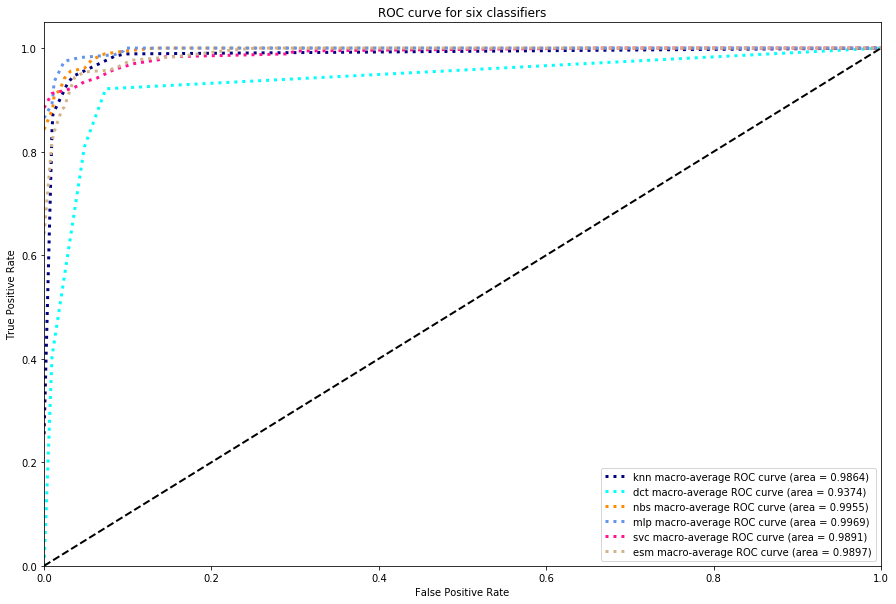

In [72]:
# Plot all ROC curves
plt.figure(figsize=[15,10])
plt.plot(fpr_knn["macro"], tpr_knn["macro"],
         label='knn macro-average ROC curve (area = {0:0.4f})'
               ''.format(roc_auc_knn["macro"]),
         color='navy', linestyle=':', linewidth=3)

plt.plot(fpr_dct["macro"], tpr_dct["macro"],
         label='dct macro-average ROC curve (area = {0:0.4f})'
               ''.format(roc_auc_dct["macro"]),
         color='aqua', linestyle=':', linewidth=3)

plt.plot(fpr_nbs["macro"], tpr_nbs["macro"],
         label='nbs macro-average ROC curve (area = {0:0.4f})'
               ''.format(roc_auc_nbs["macro"]),
         color='darkorange', linestyle=':', linewidth=3)

plt.plot(fpr_mlp["macro"], tpr_mlp["macro"],
         label='mlp macro-average ROC curve (area = {0:0.4f})'
               ''.format(roc_auc_mlp["macro"]),
         color='cornflowerblue', linestyle=':', linewidth=3)

plt.plot(fpr_svc["macro"], tpr_svc["macro"],
         label='svc macro-average ROC curve (area = {0:0.4f})'
               ''.format(roc_auc_svc["macro"]),
         color='deeppink', linestyle=':', linewidth=3)

plt.plot(fpr_esm["macro"], tpr_esm["macro"],
         label='esm macro-average ROC curve (area = {0:0.4f})'
               ''.format(roc_auc_esm["macro"]),
         color='tan', linestyle=':', linewidth=3)

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for six classifiers')
plt.legend(loc="lower right")
plt.show()

## Part 5. Make predictions and evaluate performance on the test set

In [140]:
# sepearte the Class attribute from the test data

actual = np.array(wine_test['Class']) 
test = np.array(wine_test.iloc[:, 0:6])

In [141]:
#k-Nearest Neighbors

pred = knn_f.predict(test)
accuracy_score(actual, pred)


0.97222222222222221

In [142]:
# Decision Tree

pred = dct_f.predict(test)
accuracy_score(actual, pred)

0.97222222222222221

In [143]:
#Naïve Bayes 

pred = nbs_f.predict(test)
accuracy_score(actual, pred)

0.91666666666666663

In [144]:
#Artificial Neural Network

pred = mlp_f.predict(test)
accuracy_score(actual, pred)

0.94444444444444442

In [145]:
#Support Vector Machine

pred = svc_f.predict(test)
accuracy_score(actual, pred)

0.94444444444444442

In [146]:
#Ensemble Classifier

pred = esm_f.predict(test)
accuracy_score(actual, pred)

0.94444444444444442

In conclusion:

   all the above classifers generalized well. Only the accuracy score of the Naive Bayes Classifer seemed 
to be a little bit lower than the accuracy score generated with validation set in part3. Since this is a small database and the data quality in it is quite high, we are expecting the accuracy scores of the test data to be close to the accuracy scores of the validation data generated in part3.

## Part 6. Exceptional work

#### 1. Use a hyper-parameter optimizer (e.g. model_selection.GridSearchCV) for one of the six models, re-run that classifier. Report any differences in performance.

In [153]:
from sklearn.model_selection import GridSearchCV

param_grid = {'splitter':['random','best'],'max_depth': np.arange(5, 12),'min_samples_leaf':np.arange(3,10)}

tree = GridSearchCV(DecisionTreeClassifier(), param_grid)

accuracy score: 0.852113
f1_score: 0.850568

 Predicted   1   2   3  All
Actual                    
1          44   3   0   47
2           5  48   6   59
3           1   6  29   36
All        50  57  35  142 

AUC (macro):0.972254
AUC (micro):0.976009


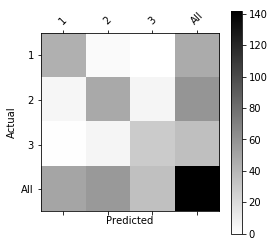

In [154]:
# Learn to predict each class against the other
predicted = cross_val_predict(tree, X, y, cv=3)  # stratified 5-fold cross validation
y_score = cross_val_predict(tree, X, y, cv=3, method='predict_proba')
tree_f = tree.fit(X,y)

# report accuracy and f1-score
acc = accuracy_score(y, predicted)
print('accuracy score: %f'%acc)
f1 = f1_score(y, predicted,average='macro')
print('f1_score: %f'%f1)

y_actu = pd.Series(y, name='Actual')
y_pred = pd.Series(predicted, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
plot_confusion_matrix(df_confusion)
print('\n',df_confusion,'\n')

# multiclass ROC curve
# Compute ROC curve and ROC area for each class
fpr_tree = dict()
tpr_tree = dict()
roc_auc_tree = dict()
for i in range(n_classes):
    fpr_tree[i], tpr_tree[i], _ = roc_curve(y_b[:, i], y_score[:, i])
    roc_auc_tree[i] = auc(fpr_tree[i], tpr_tree[i])

# Compute micro-average ROC curve and ROC area
fpr_tree["micro"], tpr_tree["micro"], _ = roc_curve(y_b.ravel(), y_score.ravel())
roc_auc_tree["micro"] = auc(fpr_tree["micro"], tpr_tree["micro"])

# Compute macro-average ROC curve and ROC area
# First aggregate all false positive rates
all_fpr_tree = np.unique(np.concatenate([fpr_tree[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr_tree = np.zeros_like(all_fpr_tree)
for i in range(n_classes):
    mean_tpr_tree += interp(all_fpr_tree, fpr_tree[i], tpr_tree[i])

# Finally average it and compute AUC
mean_tpr_tree /= n_classes

fpr_tree["macro"] = all_fpr_tree
tpr_tree["macro"] = mean_tpr_tree
roc_auc_tree["macro"] = auc(fpr_tree["macro"], tpr_tree["macro"])

print('AUC (macro):%f'%roc_auc_tree["macro"])
print('AUC (micro):%f'%roc_auc_tree["micro"])

When using grid search to choose the max_depth, splitter rule, min_samples_leaf, we could read a higher AUC than the previous setting.

2.Experiment with different weights and/or distance metrics for the
KNeighborsClassifier. Try at least three different configurations and report your
findings. Which, if any, performed better than your “off the shelf” results?

In [121]:
# "off the self" implementation given on the sklearn website.

knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', 
                           leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=1)

# Learn to predict each class against the other
predicted = cross_val_predict(knn, X, y, cv=3)  # stratified 5-fold cross validation
y_score = cross_val_predict(knn, X, y, cv=3, method='predict_proba')
knn_f = knn.fit(X,y)

# report accuracy and f1-score
acc = accuracy_score(y, predicted)
print('accuracy score: %f'%acc)
f1 = f1_score(y, predicted,average='macro')
print('f1_score: %f'%f1)

accuracy score: 0.936620
f1_score: 0.937227


In [96]:
# weights = uniform
# metric = minkowski

knn = KNeighborsClassifier(n_neighbors=3, weights='distance', algorithm='auto',
                           leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=1)


# Learn to predict each class against the other
predicted = cross_val_predict(knn, X, y, cv=3)  # stratified 5-fold cross validation
y_score = cross_val_predict(knn, X, y, cv=3, method='predict_proba')
knn_f = knn.fit(X,y)

# report accuracy and f1-score
acc = accuracy_score(y, predicted)
print('accuracy score: %f'%acc)
f1 = f1_score(y, predicted,average='macro')
print('f1_score: %f'%f1)



accuracy score: 0.936620
f1_score: 0.939303


In [102]:
# weights = uniform
# metric = minkowski

knn = KNeighborsClassifier(n_neighbors=3, weights='uniform', algorithm='auto',
                           leaf_size=30, p=5, metric='minkowski', metric_params=None, n_jobs=1)

# Learn to predict each class against the other
predicted = cross_val_predict(knn, X, y, cv=3)  # stratified 5-fold cross validation
y_score = cross_val_predict(knn, X, y, cv=3, method='predict_proba')
knn_f = knn.fit(X,y)

# report accuracy and f1-score
acc = accuracy_score(y, predicted)
print('accuracy score: %f'%acc)
f1 = f1_score(y, predicted,average='macro')
print('f1_score: %f'%f1)

accuracy score: 0.929577
f1_score: 0.931121


In [155]:
# weights = distance
# metric = manhattan

knn = KNeighborsClassifier(n_neighbors=3, weights='uniform', algorithm='auto',
                           leaf_size=30, metric='manhattan', metric_params=None, n_jobs=1)

# Learn to predict each class against the other
predicted = cross_val_predict(knn, X, y, cv=3)  # stratified 5-fold cross validation
y_score = cross_val_predict(knn, X, y, cv=3, method='predict_proba')
knn_f = knn.fit(X,y)

# report accuracy and f1-score
acc = accuracy_score(y, predicted)
print('accuracy score: %f'%acc)
f1 = f1_score(y, predicted,average='macro')
print('f1_score: %f'%f1)

accuracy score: 0.943662
f1_score: 0.945675


In [97]:
# weights = uniform
# metric = chebyshev

knn = KNeighborsClassifier(n_neighbors=3, weights='uniform', algorithm='auto',
                           leaf_size=30, metric='chebyshev', metric_params=None, n_jobs=1)

# Learn to predict each class against the other
predicted = cross_val_predict(knn, X, y, cv=3)  # stratified 5-fold cross validation
y_score = cross_val_predict(knn, X, y, cv=3, method='predict_proba')
knn_f = knn.fit(X,y)

# report accuracy and f1-score
acc = accuracy_score(y, predicted)
print('accuracy score: %f'%acc)
f1 = f1_score(y, predicted,average='macro')
print('f1_score: %f'%f1)

accuracy score: 0.929577
f1_score: 0.931194


In Conlusion: 
1. The second and third trials tested whether the value of parameter weights made a difference in our prediction of the validation dataset. From these two trials we can see that the value of the parameter, regardless of wheter 'uniform' or 'distance' is used, does not affect the accuracy score and the f1 score of the KNeighborsClassifier tested on our validation set.


2. The fourth, fifth, sixth trials tested the different distance metrics available for the metric parameter. From the trials we can clearly see that the accuracy score and the f1 score for the KNeighborsClassifier tested on our  were the highest when metric = 'manhatton', and second highest when metric='minkowski' and p = a number greater than 2, and the lowest when metric = 'chebyshev'.


3. Compared with the "off the slef" implementation of KNeighborsClassifier which is the firt trial, only the trial with metric = 'manhatton' had a higher accuracy and f1 score. 